# Nonlinear constrained optimisation

Luca Magri (lm547@cam.ac.uk)

(With many thanks to Professor Gábor Csányi.)

Unless otherwise specified, the functions $f$ in this lecture are multi-variable ($x\in\mathbb{R}^N$), with continuous first (and second-order where necessary) derivatives, and nonlinear. 

## List of contents
1. Problem definition 
1. Optimality condition on active constraints
1. Lagrange multipliers for equality constraints
1. Karush-Kuhn-Tucker (KKT) multipliers for inequality constraints
2. Penalty and Barrier methods

## Problem definition and terminology

Minimize

$$
f(x), \qquad x = (x_1,x_2,\ldots,x_N)^T
$$

Subject to 

$$
h_i(x) = 0, \qquad i=1,2,\ldots m
$$
$$
g_j(x) \leq 0, \qquad j=1,2,\ldots n
$$

- $f$ is in general nonlinear
- $h_i$ are the equality constraints
- $g_i$ are the inequality constraints 
- The set of equality and inequality constraints defines the __feasible region__ 
- Calculating the minimum of $-f(x)$ is the same as calculating the maximum of $f(x)$

- At a location $x$, constraints are
 - __active__ if they do not allow $x$ to infinitesimally change in at least one direction  
 - __inactive__ if they allow $x$ to infinitesimally change in any direction 

- Equality constraints are always active by definition 

- Inequality constraints can be active or inactive  depending on the location of the point $x$ in the feasible region
$$
\begin{array}{ll}
g_j(x) = 0 & \text{is active}\\
g_j(x) < 0 & \text{is inactive} 
\end{array}
$$

In [2]:
from pylab import *
import numpy as np
import matplotlib.patches as patches




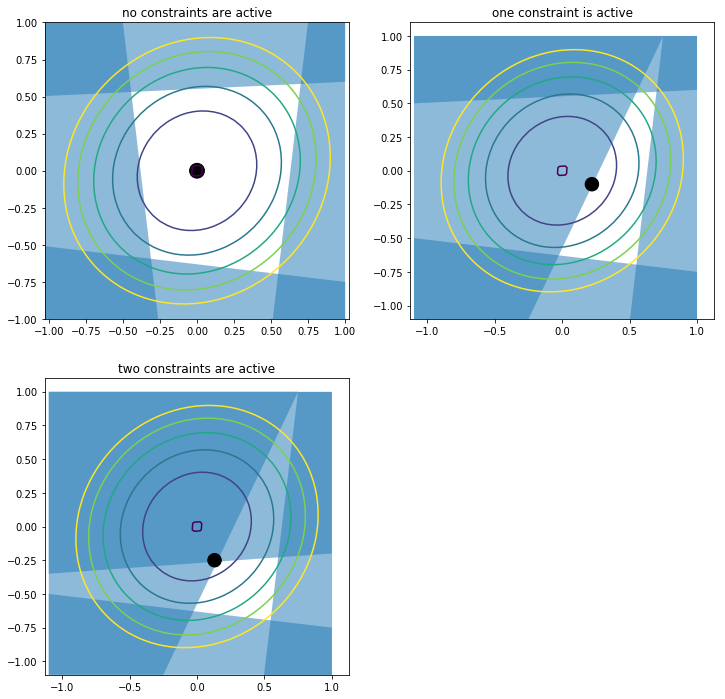

In [3]:
def Q(x):
    return x[0]**2+x[1]**2 - 0.2*x[0]*x[1]
def dQ(x):
    return np.array([2*x[0]-0.2*x[1], 2*x[1]-0.2*x[0]])
x, y = np.meshgrid(np.linspace(-1.1,1.1,50), np.linspace(-1.1,1.1,50))
Qxy = [[Q(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]

figure(figsize=(12,12))
subplot(2,2,1)
contour(x, y, Qxy, linspace(0.002, 0.8, 6))
gca().add_patch(patches.Polygon([[-1.1, -1.1],[-0.25,-1.1],[-0.5,1.0],[-1.1,1.0]], closed=True,fill=True, alpha=0.5))
gca().add_patch(patches.Polygon([[-1.1, -1.1],[1.0,-1.1],[1.0,-0.75],[-1.1,-0.5]], closed=True,fill=True, alpha=0.5))
gca().add_patch(patches.Polygon([[0.5, -1.1],[1.0,-1.1],[1.0,1.0],[0.75,1.0]], closed=True, fill=True, alpha=0.5))
gca().add_patch(patches.Polygon([[-1.1, 0.5],[1.0,0.6],[1.0,1.0],[-1.1,1.0]], closed=True, fill=True, alpha=0.5))
gca().add_patch(patches.Circle((0.0,0.0),0.05,fill=True, color="k"))
axis('equal'); axis([-1,1,-1,1])
title('no constraints are active')


subplot(2,2,2)
contour(x, y, Qxy, linspace(0.002, 0.8, 6))
gca().add_patch(patches.Polygon([[-1.1, -1.1],[-0.25,-1.1],[0.75,1.0],[-1.1,1.0]], closed=True,fill=True, alpha=0.5))
gca().add_patch(patches.Polygon([[-1.1, -1.1],[1.0,-1.1],[1.0,-0.75],[-1.1,-0.5]], closed=True,fill=True, alpha=0.5))
gca().add_patch(patches.Polygon([[0.5, -1.1],[1.0,-1.1],[1.0,1.0],[0.75,1.0]], closed=True, fill=True, alpha=0.5))
gca().add_patch(patches.Polygon([[-1.1, 0.5],[1.0,0.6],[1.0,1.0],[-1.1,1.0]], closed=True, fill=True, alpha=0.5))
gca().add_patch(patches.Circle((0.22,-0.10),0.05,fill=True, color="k"))
title('one constraint is active')
axis('equal')

subplot(2,2,3)
contour(x, y, Qxy, linspace(0.002, 0.8, 6))
axis('equal')
gca().add_patch(patches.Polygon([[-1.1, -1.1],[-0.25,-1.1],[0.75,1.0],[-1.1,1.0]], closed=True,fill=True, alpha=0.5))
gca().add_patch(patches.Polygon([[-1.1, -1.1],[1.0,-1.1],[1.0,-0.75],[-1.1,-0.5]], closed=True,fill=True, alpha=0.5))
gca().add_patch(patches.Polygon([[0.5, -1.1],[1.0,-1.1],[1.0,1.0],[0.75,1.0]], closed=True, fill=True, alpha=0.5))
gca().add_patch(patches.Polygon([[-1.1, -0.35],[1.0,-0.2],[1.0,1.0],[-1.1,1.0]], closed=True, fill=True, alpha=0.5))
gca().add_patch(patches.Circle((0.13,-0.25),0.05,fill=True, color="k"))
title('two constraints are active')


#subplot(2,2,4)
#contour(x, y, Qxy, linspace(0.002, 0.8, 6))
#axis('equal')

show()

- In $N$ dimensions, it is not possible to have a solution when more than $N$ independent constraints are active

- If it were possible to know in advance which inequality constraints are _active_ and which are _inactive_ at the optimum:
 - the inactive constraints could be ignored and the active constraints could be treated as equality constraints
  - In most problems, it is not possible to know in advance which inequality constraints are active

## Optimality condition on active constraints

- The necessary condition for $x^*$ to be a local minimum is 

$$
{d^T \nabla f(x^*) \geq 0 \qquad \text{for all feasible directions } d \textrm{ at } x^*}
$$

- In unconstrained problems, any direction $d$ is feasible
 - Hence, $\nabla f(x^*) = 0$
 
- In constrained optimization, some directions $d$ may not be feasible
 - Therefore, in the general situation in constrained optimization 
 $$d^T \nabla f(x^*) \geq 0 \;\not\!\!\!\implies \nabla f(x^*)=0$$ 
 (the symbol $\;\not\!\!\!\implies$ means "does not necessarily imply")
 <- The optimality condition is _weaker_. ->




### Optimality condition on a single active constraint
Consider that 
- $x$ is subject to one equality constraint $h(x) = 0$
- $d$ is the _tangential_ direction to the constraint. Supppose, $\pm d$ is a feasible direction  

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


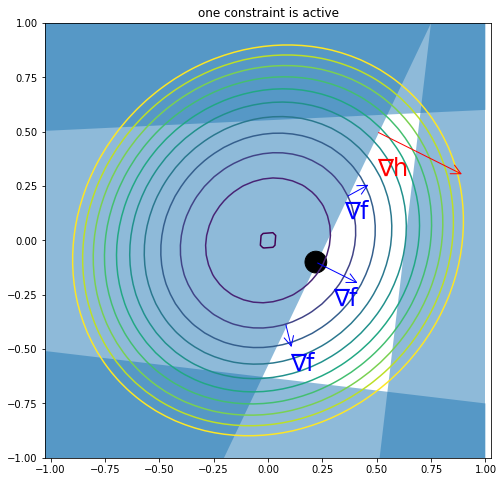

In [4]:
from __future__ import unicode_literals
figure(figsize=(8,8))
contour(x, y, Qxy, linspace(0.002, 0.8, 11), color="k")
gca().add_patch(patches.Polygon([[-1.1, -1.1],[-0.25,-1.1],[0.75,1.0],[-1.1,1.0]], closed=True,fill=True, alpha=0.5))
gca().add_patch(patches.Polygon([[-1.1, -1.1],[1.0,-1.1],[1.0,-0.75],[-1.1,-0.5]], closed=True,fill=True, alpha=0.5))
gca().add_patch(patches.Polygon([[0.5, -1.1],[1.0,-1.1],[1.0,1.0],[0.75,1.0]], closed=True, fill=True, alpha=0.5))
gca().add_patch(patches.Polygon([[-1.1, 0.5],[1.0,0.6],[1.0,1.0],[-1.1,1.0]], closed=True, fill=True, alpha=0.5))
gca().add_patch(patches.Circle((0.22,-0.10),0.05,fill=True, color="k"))
annotate(s='', xy=(0.42,-0.2), xytext=(0.22,-0.1), arrowprops=dict(arrowstyle='->',color="b"), fontsize=24); text(0.30, -0.30, "∇f", fontsize=24, color="b");
annotate(s='', xy=(0.9,0.3), xytext=(0.5,0.5), arrowprops=dict(arrowstyle='->',color="r"), fontsize=24); text(0.50, 0.30, "∇h", fontsize=24, color="r");
annotate(s='', xy=(0.11,-0.5), xytext=(0.08,-0.38), arrowprops=dict(arrowstyle='->',color="b"), fontsize=24); text(0.1, -0.60, "∇f", fontsize=24, color="b");
annotate(s='', xy=(0.47,0.26), xytext=(0.36,0.2), arrowprops=dict(arrowstyle='->',color="b"), fontsize=24); text(0.35, 0.1, "∇f", fontsize=24, color="b");
title('one constraint is active')
axis('equal')
axis([-1,1,-1,1])
show()

  - If $d^T \nabla f(x) < 0$, then $x$ is not a minimum
  - If $d^T \nabla f(x) > 0$, then in the opposite direction $-d$, $d^T \nabla f(x) < 0$ so $x$ cannot be a minimum
  - In conclusion, $x$ is a minimum if $d^T \nabla f(x)=0$
  
  
 - Geometrically, the gradient at the minimum is _perpendicular_ to the _tangent directions_ to the constraint
  - We have already seen this in the exact line search with search directions
 
 - Consequently, at a minimum, the gradient of the function is parallel to the gradient of the constraint: 

    $$
    \nabla f(x^*) \parallel \nabla h(x^*)
    $$
- Therefore, there must exist a scalar $\lambda$ such that
    $$
    \nabla f(x^*) = -\lambda \nabla h(x^*)
    $$

### Optimality condition on multiple active constraints
- With two independent constraints, the intersection of the constraints is a onedimensional curve
 - The optimality condition is that $\nabla f$ at the local minimum points in the _perpendicular_ direction to the tangent plane of the intersection curve 

<img src="./multiconstraint.png" width=500>


- With multiple independent constraints $m$, at a minimum, $\nabla f$ must be perpendicular to the tangent plane of the _constraint intersection_, which has dimensionality $N-m$

- For the multi-dimensional case, the optimality condition is 
  \begin{align}
  \nabla f(x) &= -\sum_{i=1}^m \lambda_{i} \nabla h_i(x) \\
  &= -\nabla h(x)^T {\lambda}\;\;\;\;\textrm{at a minimum}\;\; x=x^*\\
  \\
  h_i(x)&=0\;\;\;i=1,2,\ldots,m
  \end{align}
  where $\lambda=[\lambda_1, \lambda_2, \ldots, \lambda_m]^T$ is a vector that contains $m$ scalars
- The gradient of $f$ is a linear combination of the gradients of the active constraint 
 - The variables vary according to the constraint equations $h_i(x)$
- There are $N+m$ equations, $N$ unknown control variables $x_i$ and $m$ unknown coefficients $\lambda_i$

## Lagrangian and optimality condition for equality constraints

- The optimality condition can be recovered by defining an _unconstrained_ minimisation problem with a new cost function $L$

\begin{align}
L(x,\lambda_i) = f(x) + \sum_{i=1}^m \lambda_i h_i(x) 
\end{align}

- $L$ is the __Lagrangian__
- $\lambda_i$ are the __Lagrange multipliers__, which are scalars 
- Note that $L(x)=f(x)$ because we have added $h_i$, which are zero! Adding zero is perfectly reasonable.  

- $x^*$ is a stationary point of the Lagrangian, $L(x)$ if

  $$
  \nabla L(x^*, \lambda) = 0  \implies \nabla f(x^*) + [\nabla h(x^*)]^T \lambda = 0 
  $$
  and 
  $$ h_i(x)=0\;\;\;i=,2,\ldots,m$$

- The constrained optimization problem can be written as an unconstrained optimization problem with the Lagrangian $L(x,\lambda)$ and the optimality conditions as $\nabla L=0$  

- The previous conditions are necessary for a stationary point $x^*$ to be a minimum, but not sufficient 
- A sufficient condition is provided by the Hessian

  $$
  d^T \nabla^2 L(x^*) d > 0 \qquad d \in \text{ space tangent to all constraints}
  $$

    i.e. $\nabla^2 L$ is positive definite _in the tangent space_. 

## Example

Calculate the stationary points by using the Lagrangian and the optimality condition of the following constrained problem

$$
f(x) = x_1 x_2^2
$$
subject to
$$
h(x) = x_1^2+x_2^2 - 2 = 0
$$

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


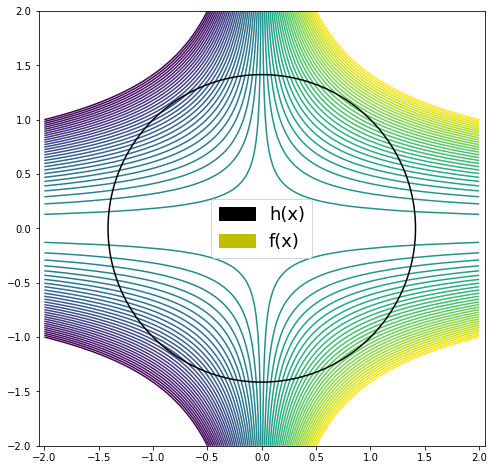

In [5]:
def h(x):
    return x[0]**2+x[1]**2 - 2.0
def f(x):
    return x[0]*x[1]**2

x, y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
fxy = [[f(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]
hxy = [[h(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]

figure(figsize=(8,8))
contour(x, y, fxy, linspace(-2, 2, 60), label="f(x)")
contour(x, y, hxy, linspace(0, 0.1, 1), colors=['k'], label="h(x)")
axis('equal'); axis([-2,2,-2,2])
hh = patches.Patch(color='k', label='h(x)')
fh = patches.Patch(color='y', label='f(x)')
legend(handles=[hh,fh], loc=10, fontsize=18)

show()

1. Define the Lagrangian 
$$
L(x,\lambda) = x_1x_2^2 + \lambda(x_1^2+x_2^2-2)
$$
2. Set optimality conditions 
$$
\begin{array}{rcl}
\frac{\partial L}{\partial x_1} = x_2^2 + 2x_1\lambda &=& 0\\
\frac{\partial L}{\partial x_2} = 2x_1x_2 + 2x_2\lambda &=& 0\\
x_1^2+x_2^2 - 2 &=& 0
\end{array}
$$

3. Solve for the three unknowns $x_1$, $x_2$ and $\lambda$
$$
\begin{array}{rrr}
x_1&x_2&\lambda\\
\hline
\pm\sqrt{2}&0&0\\
\mp\sqrt{2/3} & \sqrt{4/3} & \pm \sqrt{2/3}\\
\mp\sqrt{2/3} & -\sqrt{4/3} & \pm \sqrt{2/3}\\
\end{array}
$$


- Note that problem is symmetric in $x_2$, corresponding to two pairs of solutions. 
-  A higher-order derivative test would identify $(-\sqrt{2}, 0)$ and $(+\sqrt{2/3}, +\sqrt{4/3})$ as local maxima, and the other points as local minima
- The Lagrange multiplier $\lambda=0$ signifies that $\nabla f(x)=0$ at that point

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


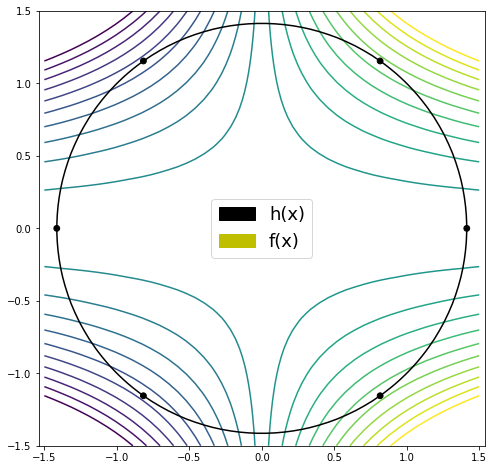

In [6]:
def h(x):
    return x[0]**2+x[1]**2 - 2.0
def f(x):
    return x[0]*x[1]**2

x, y = np.meshgrid(np.linspace(-1.5,1.5,50), np.linspace(-1.5,1.5,50))
fxy = [[f(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]
hxy = [[h(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]

figure(figsize=(8,8))
contour(x, y, fxy, linspace(-2, 2, 20), label="f(x)")
contour(x, y, hxy, linspace(0, 0.1, 1), colors=['k'], label="h(x)")
axis('equal'); axis([-1.5,1.5,-1.5,1.5])
hh = patches.Patch(color='k', label='h(x)')
fh = patches.Patch(color='y', label='f(x)')
legend(handles=[hh,fh], loc=10, fontsize=18)

gca().add_patch(patches.Circle((-np.sqrt(2.0),0), 0.02, fill=True,  color='k'))
gca().add_patch(patches.Circle(( np.sqrt(2.0),0), 0.02, fill=True,  color='k'))
gca().add_patch(patches.Circle((-np.sqrt(2.0/3.0), np.sqrt(4.0/3.0)), 0.02, fill=True,  color='k'))
gca().add_patch(patches.Circle(( np.sqrt(2.0/3.0), np.sqrt(4.0/3.0)), 0.02, fill=True,  color='k'))
gca().add_patch(patches.Circle((-np.sqrt(2.0/3.0),-np.sqrt(4.0/3.0)), 0.02, fill=True,  color='k'))
gca().add_patch(patches.Circle(( np.sqrt(2.0/3.0),-np.sqrt(4.0/3.0)), 0.02, fill=True,  color='k'))


show()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


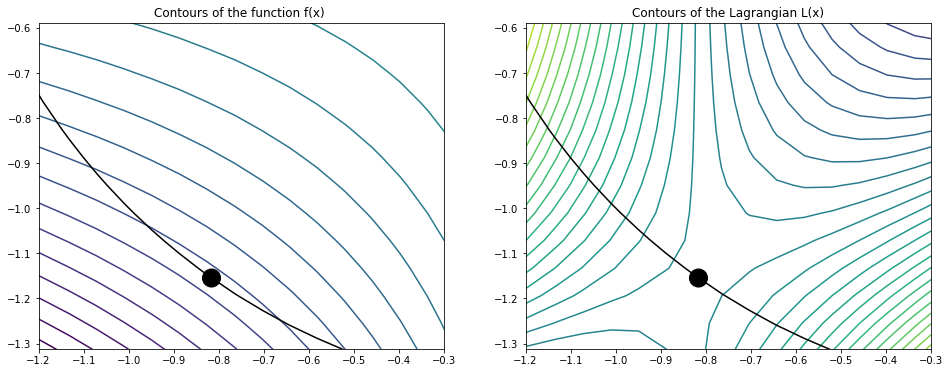

In [7]:
def L(x):
    return x[0]*x[1]**2 + np.sqrt(2.0/3.0)*(x[0]**2+x[1]**2 - 2.0)

figure(figsize=(16,6))
x, y = np.meshgrid(np.linspace(-1.5,1.5,50), np.linspace(-1.5,1.5,50))
fxy = [[f(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]
hxy = [[h(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]
Lxy = [[L(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]

subplot(1,2,1)
contour(x, y, fxy, linspace(-2, 2, 30), label="f(x)")
contour(x, y, hxy, linspace(0, 0.1, 1), colors=['k'], label="h(x)")
gca().add_patch(patches.Circle((-np.sqrt(2.0/3.0),-np.sqrt(4.0/3.0)), 0.02, fill=True,  color='k'))
axis('equal'); axis([-1.2,-0.3,-1.2,-0.7])
title("Contours of the function f(x) ")

subplot(1,2,2)
contour(x, y, Lxy, linspace(-2, -0.5, 50))
contour(x, y, hxy, linspace(0, 0.1, 1), colors=['k'])
gca().add_patch(patches.Circle((-np.sqrt(2.0/3.0),-np.sqrt(4.0/3.0)), 0.02, fill=True,  color='k'))
axis('equal'); axis([-1.2,-0.3,-1.2,-0.7])
title("Contours of the Lagrangian L(x)")

show()

## Lagrangian and optimality conditions for inequality constraints

- We define the Lagrangian   
$$
L(x,\mu_j) = f(x) + \sum_{j=1}^{n} \mu_j g_j(x)
$$

- If $x^*$ is stationary point of $L(x)$, then
  $$
  \nabla L(x^*, \mu_j)=0 \implies \nabla f(x^*) + [\nabla g(x^*)] ^T \mu = 0
  $$
  and 
\begin{align}
\mu_j g_j(x) &= 0\\ 
\mu_j &\geq 0, \quad j=1,2,\ldots, n
\end{align}

- These conditions are called __Karush-Kuhn-Tucker (KKT) conditions__
- $\mu_j$ are the __KKT multipliers__ 

- For _active constraints_, $g_j(x) = 0$ and the constraint becomes an equality constraint
- For _inactive constraints_, $g_j(x) < 0$ and $\mu_j = 0$.
<-Note that if in the previous example, we replace the equality constraint by an inequality constraint, so $h(x) \rightarrow g(x)$ and $\lambda \rightarrow \mu$, then the number of candidate solutions decreases because we need $\mu \geq 0$ !->
- In the general case with both equality and inequality constraints $$L(x,\lambda,\mu)=f(x) + \sum_{i=1}^{m} \lambda_i h_i(x) + \sum_{j=1}^{n} \mu_j g_j(x)$$

## Sensitivity 

- How much does the cost function $f$ change if we perturb the solution by an infinitesimally small amount, i.e., $x^* + \delta x$?
 \begin{align}
\delta x^T\nabla f(x^*) &=- \delta x^T([\nabla h(x^*)]^T \lambda +[\nabla g(x^*)] ^T \mu) \\
\delta f(x^*) &=- \delta h(x^*)^T \lambda - \delta g(x^*)^T \mu 
\end{align}

- The change in the cost function due to a change in the solution, or the constraints, is proportional to the negative Lagrange multipliers and negative KKT multipliers.
 - In other words, $-\lambda_i$ and $-\mu_j$ are the sensitivities of $f$ to an infinitesimal change in the constraint $h_i$ and $g_j$, respectively.

<!--- 3.3.2020 Below is the old version from Luenberger. Unreasonably complicated for this course with this limited amount of time. LM.
- We often want to know how sensitive is the problem (and the solution) to a small change in the constraints  

- Consider the _family_ of problems:
$$
\text{Minimize } f(x) \text{ subject to } h(x) = c
$$

  and suppose that we have solutions $x(c)$ that vary smoothly with $c$. Then
$$
\left.\nabla_c f(x(c))\right|_{c=0} = -\lambda
$$
where $\lambda$ is the value of the Lagrange multiplier at $c=0$.

- $\lambda$ is the sensitivity of the _solutions_ to a small change in the constraints  
--->

## Example

Calculate the stationary points by using the Lagrangian and the optimality condition of the following constrained problem (same as before but now with an inequality)

$$
f(x) = x_1 x_2^2
$$
subject to
$$
g(x) = x_1^2+x_2^2 - 2 \le 0
$$

Lagrangian $$L(x,\mu)=f(x) + \mu g(x)$$
Optimality condition $$ \nabla L=0\implies \nabla f(x) +\mu \nabla g(x)=0$$
subject to 
$$ g(x)\le 0$$
and 
$$ \mu g(x)=0; \;\;\;\;\mu\ge0$$
- Two cases to discuss
\begin{array}{r|r|r}
\textrm{Case}&g&\mu\\
\hline
1&=0&\\
2 &<0 &0\\
\end{array}

- Case 1 is that of $g$ being active. This was discussed in the previous example. The KKT-multiplier is equal to the Lagrange multiplier.
- The new case to discuss is Case 2 where $g$ is inactive. The optimality condition is
$$ \nabla f(x) = 0$$
which is 
$$ \begin{bmatrix} x_2^2\\2x_1x_2\end{bmatrix} = \begin{bmatrix} 0\\0\end{bmatrix}$$
The stationary point is $(x_1, x_2)=(0, 0)$.  A second-order derivative test would identify this point as a saddle point.

- Suppose that the constraint is now changed to $g(x)\le \epsilon$ where $\epsilon$ is a small number. How much would $f$ change in Case 1? 
 - It would change by $\delta f(x^*) \approx -\mu \epsilon$

## Penalty functions
- The idea is to replace the constrained optimization problem with an approximated unconstrained optimization problem
- With penalty functions, we do not enforce the constraints exactly, but only approximately and controllably. 
 - This is why penalty functions are sometimes called _soft_ constraints 
- We define a new _unconstrained_ problem

   $$
   q(x, \kappa) = f(x) + \kappa \sum_{i=1}^m h_i(x)^2
   $$

   where $\kappa$ is the __penalty parameter__, which is user defined, and the second term on the left hand side is a __penalty function__.
- It can handle both equalities and inequalities
- It can provide unfeasible solutions


The minimum of $q$ tends to the minimum of $f$, which is what we are seeking, as the approximation becomes more accurate

- For large $\kappa$, $h(x)$ needs to be very small and the problem is close to the constrained one 
  - This can be difficult to solve because it becomes ill-conditioned

- For small $\kappa$, $h(x)$ does not need to be very small and the constraint is violated to a larger degree.
  - This problem is easier to solve

- Typically, we start with a small $\kappa$, and progressively increase it and evolve to the solution that minimally violates the constraint. 

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


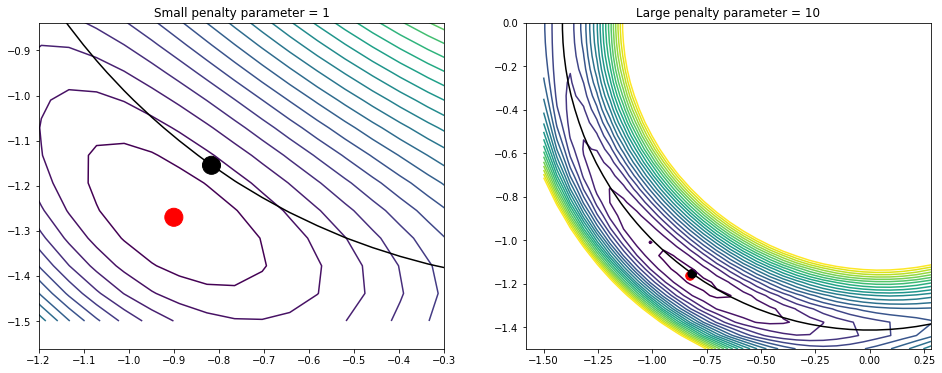

In [10]:
def f1(x):
    return x[0]*x[1]**2 + 1.0*(x[0]**2+x[1]**2 - 2)**2
def f2(x):
    return x[0]*x[1]**2 + 10.0*(x[0]**2+x[1]**2 - 2)**2

figure(figsize=(16,6))
x, y = np.meshgrid(np.linspace(-1.5,1.5,50), np.linspace(-1.5,1.5,50))
f1xy = [[f1(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]
f2xy = [[f2(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]
hxy = [[h(np.array([x[j,i],y[j,i]])) for i in range(size(x,0))   ] for j in range(size(x,1))]

subplot(1,2,1)
contour(x, y, f1xy, linspace(-2, 2, 30), label="f(x)")
contour(x, y, hxy, linspace(0, 0.1, 1), colors=['k'], label="h(x)")
gca().add_patch(patches.Circle((-np.sqrt(2.0/3.0),-np.sqrt(4.0/3.0)), 0.02, fill=True,  color='k'))
gca().add_patch(patches.Circle((-0.9,-1.27), 0.02, fill=True,  color='r'))
axis('equal'); axis([-1.2,-0.3,-1.5,-0.9])
title("Small penalty parameter = 1")

subplot(1,2,2)
contour(x, y, f2xy, linspace(-1, 5, 20), label="f(x)")
contour(x, y, hxy, linspace(0, 0.1, 1), colors=['k'], label="h(x)")
gca().add_patch(patches.Circle((-np.sqrt(2.0/3.0)-0.01,-np.sqrt(4.0/3.0)-0.01), 0.02, fill=True,  color='r'))
gca().add_patch(patches.Circle((-np.sqrt(2.0/3.0),-np.sqrt(4.0/3.0)), 0.02, fill=True,  color='k'))
axis('equal'); axis([-1.5,0.2,-1.5,-0.])
title("Large penalty parameter = 10")

show()

## Barrier functions

- For inequality constraints, $g_j(x) \leq 0$, we can use an asymmetric penalty funtion such as $\kappa \max[0,g(x)]^2$
- With a barrier method, the feasibility is enforced exactly by using a penalty that _diverges_ as we approach the boundary of the constraint

- __Inverse barrier function__:
$$
q(x,\kappa) = f(x) - \frac{1}{\kappa} \sum_{j=1}^m \frac{1}{g_j(x)}
$$

- __Logarithmic barrier function__:
$$
q(x,\kappa) = f(x) - \frac{1}{\kappa} \sum_{j=1}^m \ln [-g_j(x)]
$$

- For both, the larger $\kappa$, the sharper the divergence of the singularity near the constraint boundary
  - Hence, the harder the optimisation, but we can get solutions closer to the constraint boundary.
- It can handle only inequalities
- It cannot provide unfeasible solutions

(Replace $r$ with $\kappa$ in the figure for consistency with the notation)
<img src="./barrierfunction.png" width=500>

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


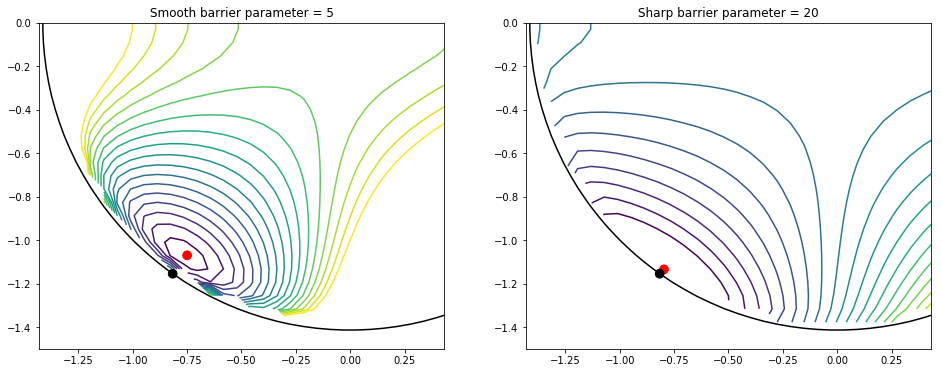

In [9]:
def f1(x):
    return x[0]*x[1]**2 - 1/5.0*np.log(-(x[0]**2+x[1]**2 - 2))
def f2(x):
    return x[0]*x[1]**2 - 1/20.0*np.log(-(x[0]**2+x[1]**2 - 2))

figure(figsize=(16,6))
x, y = np.meshgrid(np.linspace(-1.5,1.5,50), np.linspace(-1.5,1.5,50))
f1xy = [[f1(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]
f2xy = [[f2(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]
hxy = [[h(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]

subplot(1,2,1)
contour(x, y, f1xy, linspace(-0.7, 0, 20), label="f(x)")
contour(x, y, hxy, linspace(0, 0.1, 1), colors=['k'], label="h(x)")
gca().add_patch(patches.Circle((-np.sqrt(2.0/3.0),-np.sqrt(4.0/3.0)), 0.02, fill=True,  color='k'))
gca().add_patch(patches.Circle((-0.75,-1.07), 0.02, fill=True,  color='r'))
axis('equal'); axis([-1.0,-0,-1.5,-0])
title("Smooth barrier parameter = 5")

subplot(1,2,2)
contour(x, y, f2xy, linspace(-0.7, 1, 20), label="f(x)")
contour(x, y, hxy, linspace(0, 0.1, 1), colors=['k'], label="h(x)")
gca().add_patch(patches.Circle((-np.sqrt(2.0/3.0)+0.02,-np.sqrt(4.0/3.0)+0.02), 0.02, fill=True,  color='r'))
gca().add_patch(patches.Circle((-np.sqrt(2.0/3.0),-np.sqrt(4.0/3.0)), 0.02, fill=True,  color='k'))
axis('equal'); axis([-1.0,-0,-1.5,-0])
title("Sharp barrier parameter = 20")

show()